In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
plt.style.use("dark_background")
plt.rcParams['axes.labelsize'] = '14'

def preprocess_data(data):
    data["p_go_decision"] = data.decision == "go"
    data = data.join(pd.DataFrame(data["a_condition"].str.strip("[]").str.split(",").to_list(),
                                  columns=["a_0", "a_1", "a_2"]))
    data = data.astype({"a_0": float, "a_1": float, "a_2": float})
    # data["a_change"] = data.a_0 - data.a_1
    data = data[(data.RT>0) & (data.RT<4)]
    data = data[data.is_test_trial]
    print("Number of collisions: ", len(data[data.collision]))
    print(data[data.collision].pet)
    # data = data[(data.tau_condition==5) & ((data.d_condition==30) | (data.d_condition==60))]
    data = data[~((data.decision == "None") | data.collision)]
    return data

def plot_RT_hist(data):
    sns.distplot(data[data.decision=="go"].RT)
    sns.distplot(data[data.decision=="stay"].RT)

In [23]:
data = pd.read_csv("../data/pilot1/participant_3_20210627_1554.csv", sep="\t")
data = preprocess_data(data)

Number of collisions:  32
17    -0.7667
25    -0.3833
34    -0.9333
95     1.1333
98     1.8833
106   -0.1833
111   -0.4000
116   -0.9667
141    0.4833
182   -0.8667
202   -0.7167
213    0.8500
217    0.3667
232   -1.2167
238   -0.2000
249    1.9333
256   -1.3667
284   -1.2833
309   -0.3167
320   -0.6333
327   -0.5833
391   -1.7000
414   -1.1000
417    0.0167
425   -0.5167
454   -0.7667
485   -0.3333
486    1.7333
492    1.2833
499   -1.2833
500    1.6167
512   -1.2333
Name: pet, dtype: float64


## Response time histogram

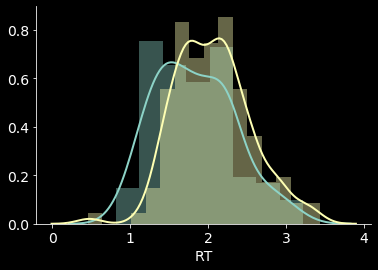

In [16]:
plot_RT_hist(data)

In [17]:
data[data.p_go_decision].RT.mean()-data[~data.p_go_decision].RT.mean()


-0.2343790095094087

## Probability of "go" decision:

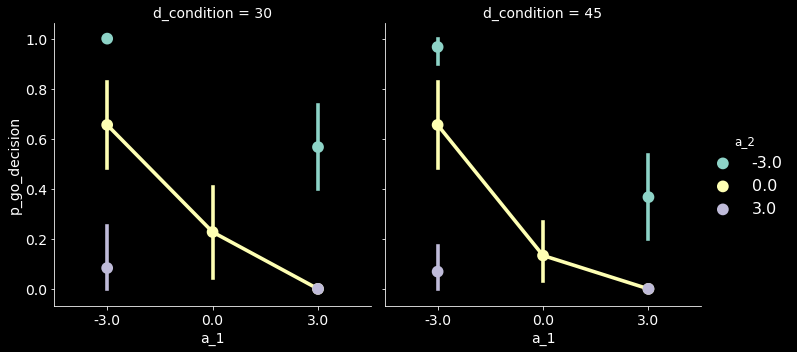

In [19]:
sns.catplot(data=data, x="a_1", y="p_go_decision", col="d_condition",
            hue="a_2", kind="point")

## Response times: "go"

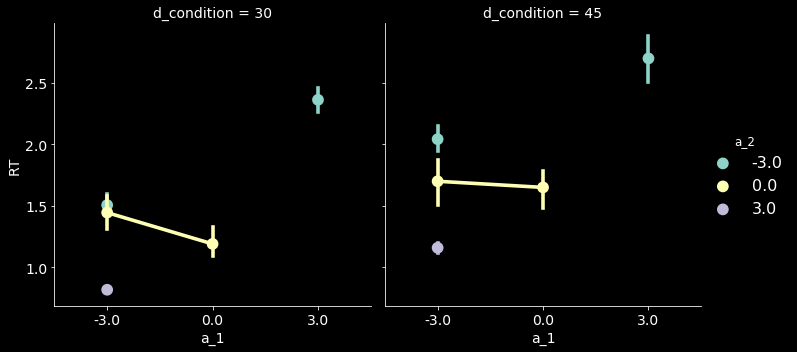

In [20]:
sns.catplot(data=data[data.decision=="go"], x="a_1", y="RT", col="d_condition",
            hue="a_2", kind="point", estimator=np.nanmean)

## Response times: "stay"

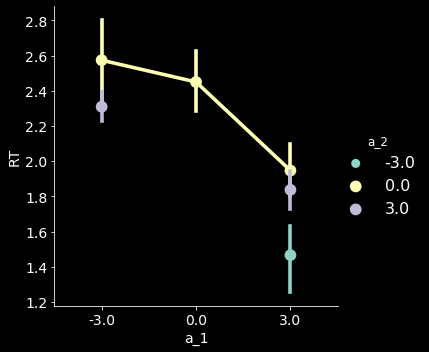

In [21]:
sns.catplot(data=data[(data.decision=="stay") & (data.d_condition==30)],
            x="a_1", y="RT", hue="a_2", kind="point", estimator=np.nanmean)
